In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns #for confusion matrix
#For data visualization
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import warnings 
warnings.filterwarnings('ignore')



In [2]:
data=pd.read_csv(r"C:\Users\acer pc\Desktop\Project\featured.csv")

In [ ]:
data.info()

In [3]:
data1 = data.drop(["id"],axis=1)

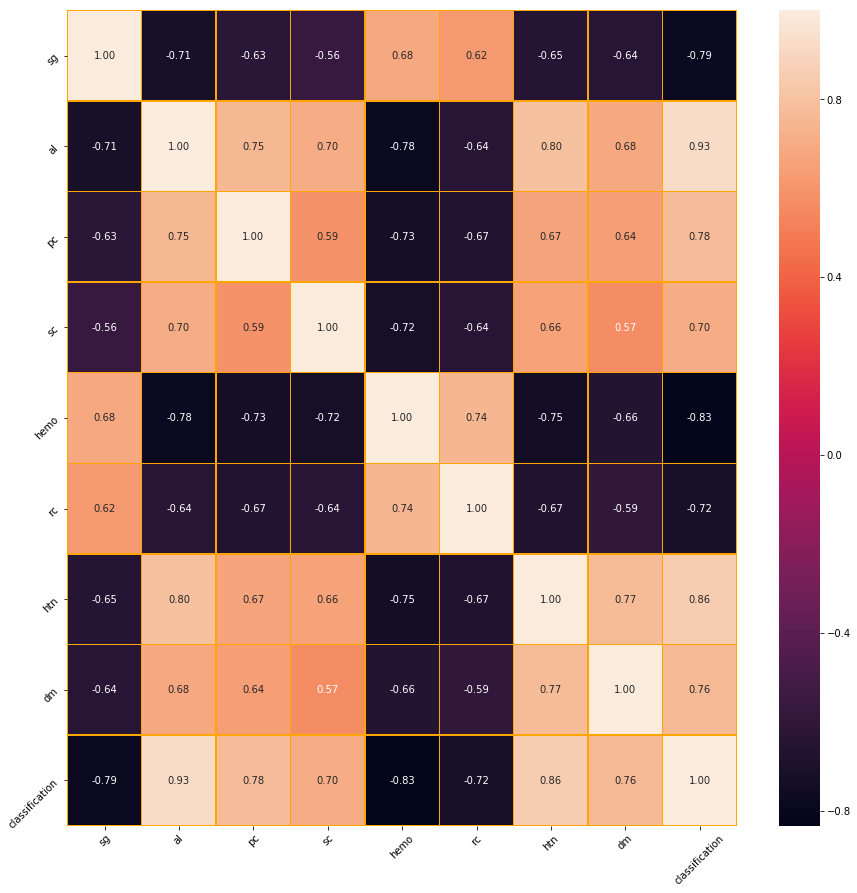

In [4]:
f,ax=plt.subplots(figsize=(15,15))
sns.heatmap(data1.corr(),annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor="orange")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [5]:
x_train = data.drop(["id"],axis = 1)
x_data = data.drop(["id"],axis = 1)
x_train = data.drop(["classification"],axis=1)
x_data = data.drop(["classification"],axis=1)

In [6]:
score = []
y=data["classification"].values
x_data=data.drop(["id","classification"],axis=1)
#x_data=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_data,y,random_state=4,test_size=0.4)



In [7]:
x_data.head()

,sg,al,pc,sc,hemo,rc,htn,dm
0,1.005,4,1,3.8,11.2,3.9,1,0
1,1.020,2,1,7.2,9.5,3.7,1,1
2,1.010,3,1,2.7,10.8,3.8,1,1
3,1.010,3,1,4.1,5.6,2.6,1,1
4,1.015,2,1,3.9,7.7,3.2,1,1


In [8]:
x_train.head()

,sg,al,pc,sc,hemo,rc,htn,dm
78,1.020,0,0,1.2,13.5,4.9,0,0
111,1.025,0,0,1.0,17.8,5.5,0,0
128,1.025,0,0,0.7,14.9,5.9,0,0
110,1.025,0,0,1.2,13.5,6.4,0,0
124,1.025,0,0,1.1,15.0,4.8,0,0


D:\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning:

numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.



Random Forest accuracy = 1.0


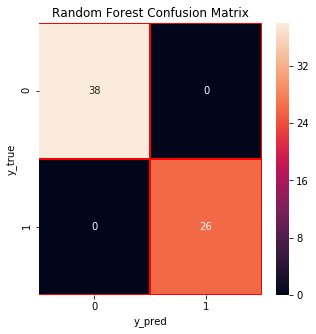

In [9]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=1)
rf.fit(x_train,y_train)
score.append(rf.score(x_test,y_test)*100)
print("Random Forest accuracy =",rf.score(x_test,y_test))

#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred=rf.predict(x_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)

#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Random Forest Confusion Matrix")
plt.show()

KNN accuracy = 96.875


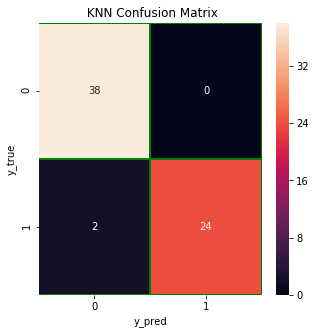

In [10]:
from sklearn.neighbors import KNeighborsClassifier

#model and accuracy
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
knn.predict(x_test)
score.append(knn.score(x_test,y_test)*100)
print("KNN accuracy =",knn.score(x_test,y_test)*100)

#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred=knn.predict(x_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)

#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="green",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title(" KNN Confusion Matrix")
plt.show()
#%%

Navie Bayes accuracy = 100.0


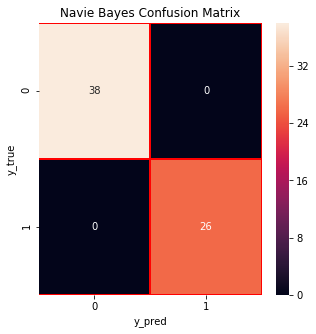

In [11]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()

#Training
nb.fit(x_train,y_train)
#Test
score.append(nb.score(x_test,y_test)*100)
print("Navie Bayes accuracy =",nb.score(x_test,y_test)*100)

#Confusion Matrix 
from sklearn.metrics import confusion_matrix
y_pred=nb.predict(x_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)

#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Navie Bayes Confusion Matrix")
plt.show()

svm test accuracy = 100.0


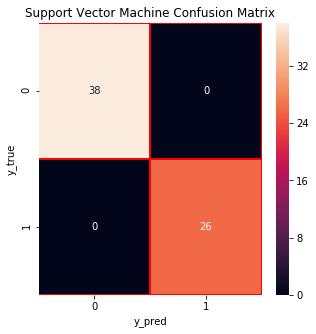

In [12]:
from sklearn.svm import SVC
svm=SVC(random_state=1)
svm.fit(x_train,y_train)
score.append(svm.score(x_test,y_test)*100)
print("svm test accuracy =",svm.score(x_test,y_test)*100)

#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred=svm.predict(x_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)

#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Support Vector Machine Confusion Matrix")
plt.show()

Decision Tree accuracy: 98.4375


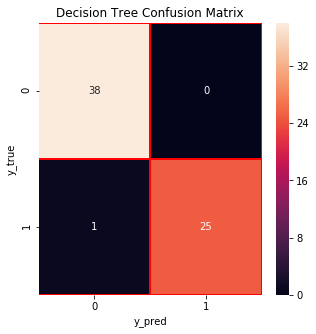

In [13]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
print("Decision Tree accuracy:",dt.score(x_test,y_test)*100)
score.append(dt.score(x_test,y_test)*100)

#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred=dt.predict(x_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)

#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Decision Tree Confusion Matrix")
plt.show()

test accuracy 0.953125


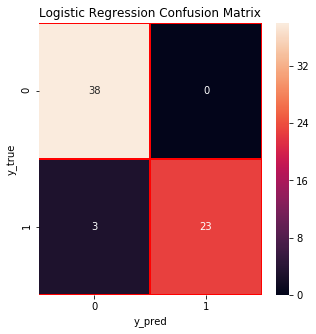

In [14]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
score.append(lr.score(x_test,y_test)*100)
print("test accuracy {}".format(lr.score(x_test,y_test)))
#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred=lr.predict(x_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)
#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

In [15]:
import pickle

In [ ]:
saved_model = pickle.dumps(rf) 
rf_from_pickle = pickle.loads(saved_model) 

In [ ]:
saved_model = pickle.dumps(knn) 
knn_from_pickle = pickle.loads(saved_model) 

In [16]:
saved_model = pickle.dumps(nb) 
nb_from_pickle = pickle.loads(saved_model) 

In [ ]:
saved_model = pickle.dumps(dt) 
dt_from_pickle = pickle.loads(saved_model) 

In [ ]:
saved_model = pickle.dumps(svm) 
svm_from_pickle = pickle.loads(saved_model) 

In [ ]:
saved_model = pickle.dumps(lr) 
lr_from_pickle = pickle.loads(saved_model) 

In [ ]:
from sklearn.externals import joblib 


In [ ]:
joblib.dump(rf, 'randomforest1.pkl') 

In [ ]:
joblib.dump(dt, 'dt1.pkl') 

In [ ]:
joblib.dump(nb, 'ra1.pkl') 

In [ ]:
joblib.dump(svm, 'randomforest1.pkl') 

In [ ]:
joblib.dump(lr, 'randomforest1.pkl') 

In [ ]:
joblib.dump(knn, 'randomforest1.pkl') 

In [ ]:
rf_from_joblib = joblib.load('nb1.pkl') 

In [ ]:

x = np.array([1,2,1,1,1,1,1,1]).reshape(1,-1)
rf_from_joblib.predict(x) 